<h1> Assignment 4, Exercise 7 - 1 <h1>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the last data set has as a third column also a label, which should be used for coloring
the plots). Perform PCA and visualize the principal components together with the data and
determine the proportion of variance for each of the components.

First step is to read the data from the csv file:

In [6]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='pca3.csv', 
    header=None, 
    sep=',')

Next, we need to center the data. For this, for each attribute, the mean of that attribute over all observations is subtracted.

In [7]:
import numpy as np

data = np.array(df.ix[:,:].values)  # transform to numpy array
data = data - np.mean(data, axis=0)

The first part of the requirement is to visualize the data. We make a 2D plot.

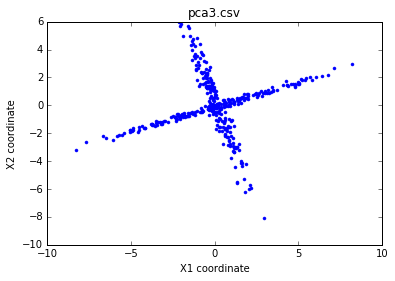

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.xlabel("X1 coordinate")
plt.ylabel("X2 coordinate")
plt.title("pca3.csv")

plt.plot(data[:,0], data[:,1], 'b.')

Then, apply PCA and display the amount of variance each of the principal components accounts for.

In [9]:
# apply pca to get the first 2 components for first dataset
from sklearn.decomposition import PCA
pca_for_ds1 = PCA(n_components=2).fit(data)

# print the ratio of the variance explained by each component
print(pca_for_ds1.explained_variance_ratio_)

[ 0.593217  0.406783]


Now, display the principal components, each with a proportional length to the amount of variance they capture. The <i>lw</i> argument in the plot stands for line weight. 

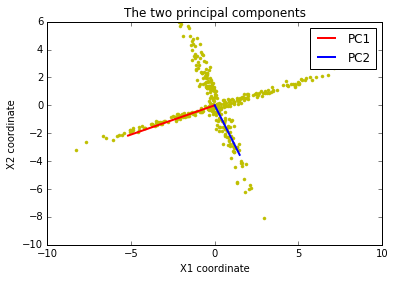

In [10]:
# display the principal components (=eigenvectors)

length_v1 = pca_for_ds1.explained_variance_[0]
length_v2 = pca_for_ds1.explained_variance_[1]

vector1 = pca_for_ds1.components_[0]*length_v1
vector2 = pca_for_ds1.components_[1]*length_v2

plt.plot(data[:,0], data[:,1], 'y.')
pc1, = plt.plot([0, vector1[0]],[0, vector1[1]],'-r',lw=2, label = "PC1")
pc2, = plt.plot([0, vector2[0]],[0, vector2[1]],'-b',lw=2, label = "PC2")
plt.legend(handles=[pc1, pc2])
plt.title("The two principal components")
plt.xlabel("X1 coordinate")
plt.ylabel("X2 coordinate")